In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk


In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'])
standardized_data = preprocessing.scale(df)

In [4]:
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
standardized_df.insert(0, 'X', 1)
df.insert(0, 'X', 1)

In [5]:
print(standardized_df)

     X        TV     Radio  Newspaper     Sales
0    1  0.969852  0.981522   1.778945  1.552053
1    1 -1.197376  1.082808   0.669579 -0.696046
2    1 -1.516155  1.528463   1.783549 -0.907406
3    1  0.052050  1.217855   1.286405  0.860330
4    1  0.394182 -0.841614   1.281802 -0.215683
..  ..       ...       ...        ...       ...
195  1 -1.270941 -1.321031  -0.771217 -1.234053
196  1 -0.617035 -1.240003  -1.033598 -0.830548
197  1  0.349810 -0.942899  -1.111852 -0.234898
198  1  1.594565  1.265121   1.640850  2.205347
199  1  0.993206 -0.990165  -1.005979 -0.119610

[200 rows x 5 columns]


In [6]:
X = standardized_df.drop(columns=["Sales"])
y = standardized_df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
def initialize_weights ():
    np.random.seed(27)
    init_w = np.random.uniform(size=4).reshape(4,1)

    return init_w

In [8]:
def predict (weights, predictors):
    predicted_values = np.array([])
    
    for i in range(predictors.shape[0]):
        y_hat = 0
        for j in range (len(predictors.columns)):
            y_hat += weights[j][0] * predictors.iloc[i, j]

        predicted_values = np.append(predicted_values, y_hat)

    return predicted_values

In [9]:
def compute_cost(predicted_values, observed_values):
    m = len(observed_values)
    squared_errors = (predicted_values - observed_values) ** 2
    
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

In [10]:
def compute_gradient(weights, predictors, observed_values, learning_rate):
    m = len(observed_values)
    j = len(weights)

    gradient = np.zeros((j, 1))
    predicted_values = predict(weights, predictors)
    errors = predicted_values - observed_values

    for i in range(j):
        gradient[i] = learning_rate * (1/m) * np.sum(errors * predictors.iloc[:, i])

    return(gradient)

In [11]:
def update_weights(weights, gradients, learning_rate):
    weights = weights - learning_rate * gradients

    return weights

In [12]:
def grad_descent(predictors, observed_values, learning_rate, iterations):
    weights = initialize_weights()

    weights_history = [weights]
    
    cost_history = []


    for i in range(iterations):
        cost = compute_cost(predict(weights, predictors), observed_values)

        cost_history.append(cost)
        
        gradients = compute_gradient(weights, predictors, observed_values, learning_rate)

        weights = update_weights(weights, gradients, learning_rate)

        weights_history.append(weights)
  
    return np.array(weights), np.array(cost_history)

In [13]:
final_weight, costs = grad_descent(X, y, learning_rate = 0.2, iterations = 300)

In [14]:
def plot_vs_iteration(y_title, y):
    plt.figure(figsize=(12, 6))
    plt.plot(y, color='blue', marker='o', linestyle='-')
    plt.title(y_title + ' vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel(y_title)
    plt.grid()

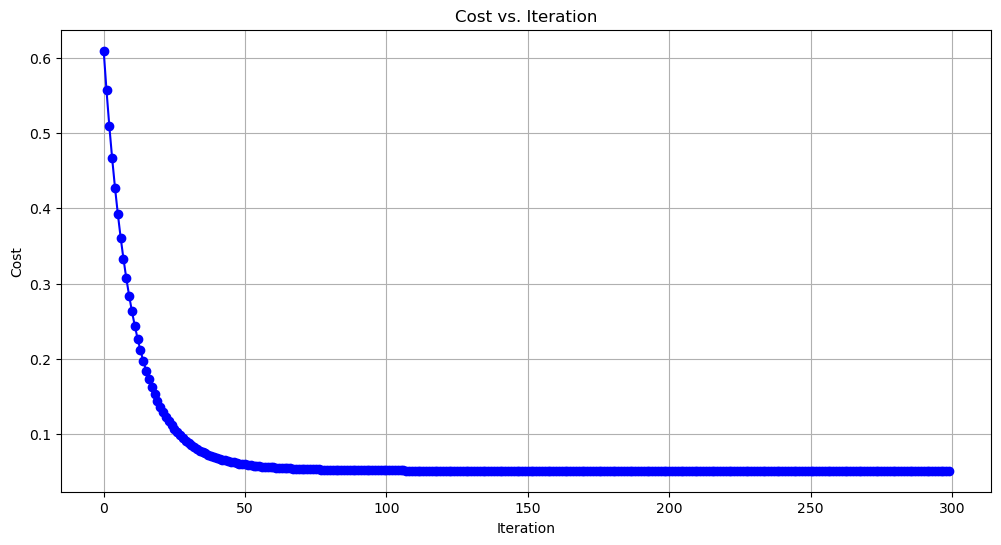

In [15]:
plot_vs_iteration("Cost", costs)

In [16]:
predicted_y_train = predict(final_weight, X_train)

train_set_cost = compute_cost(predicted_y_train, y_train)

train_set_cost

0.05442233706993051

In [17]:
predicted_y_test = predict(final_weight, X_test)

testing_set_cost = compute_cost(predicted_y_test, y_test)

testing_set_cost

0.04231175672231224

In [18]:
final_weight

array([[ 2.04406831e-06],
       [ 7.53064669e-01],
       [ 5.36350796e-01],
       [-4.19960944e-03]])

Text(-2, 2, 'R² = 0.9089')

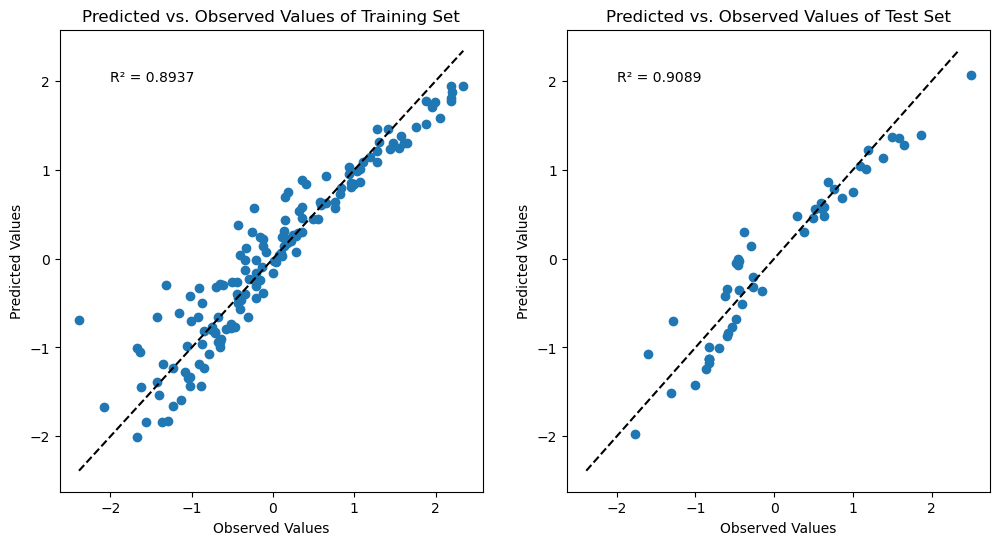

In [19]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, predicted_y_train)
r2_test = r2_score(y_test, predicted_y_test)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(y_train, predicted_y_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--') 
plt.title('Predicted vs. Observed Values of Training Set')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.annotate("R² = {:.4f}".format(r2_train), (-2, 2))

plt.subplot(1,2,2)
plt.scatter(y_test, predicted_y_test)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--') 
plt.title('Predicted vs. Observed Values of Test Set')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.annotate("R² = {:.4f}".format(r2_test), (-2, 2))

In [20]:
def data_visualization_per_iteration(predictors, observed_values, learning_rate, iterations):
    
    weights = initialize_weights()
    
    weights_history = [weights]
    mse_history = []
    r2_history = []
    cost_history = []


    for i in range(iterations):
        predicted_values = predict(weights, predictors)

        mse = (1/200) * np.sum((predicted_values - observed_values) ** 2)
        mse_history.append(mse)

        r2 = r2_score(observed_values, predicted_values)
        r2_history.append(r2)
        
        cost = compute_cost(predicted_values, observed_values)
        cost_history.append(cost)
        
        gradients = compute_gradient(weights, predictors, observed_values, learning_rate)
        
        weights = update_weights(weights, gradients, learning_rate)
        weights_history.append(weights)

    plot_vs_iteration("Mean Squared Errors", mse_history)
    plot_vs_iteration("R2 Value", r2_history)
    plot_vs_iteration("Cost", cost_history)

      
    return

In [ ]:
data_visualization_per_iteration(X, y, learning_rate = 0.2, iterations = 3000)

In [ ]:
def cost_visualization(predictors, observed_values, iterations):
    
    
    learning_rate_arr = [0.1, 0.01, 0.001, 0.0001, 0.2]
    
    plt.figure(figsize=(12, 6))
    plt.grid()
    plt.title('Cost vs Iteration for Various Learning Rates')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')


    for lr in learning_rate_arr:
        weights = initialize_weights()
        cost_history = []

        for i in range(iterations):
            cost = compute_cost(predict(weights,predictors), observed_values)
            cost_history.append(cost)
            
            gradients = compute_gradient(weights, predictors, observed_values, lr)
            weights = update_weights(weights, gradients, lr)
        
        plt.plot(cost_history, marker='o', label =f'LR: {str(lr)}')
    plt.legend()

      
    return

In [ ]:
cost_visualization(X,y, 500)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

predicted_ols_y_train = ols_model.predict(X_train)
predicted_ols_y_test = ols_model.predict(X_test)

r2_train_ols = r2_score(y_train, predicted_ols_y_train)
r2_test_ols = r2_score(y_test, predicted_ols_y_test)
mse_train_ols = mean_squared_error(y_train, predicted_ols_y_train)
mse_test_ols = mean_squared_error(y_test, predicted_ols_y_test)

r2_train_gs = r2_score(y_train, predicted_y_train)
r2_test_gs = r2_score(y_test, predicted_y_test)
mse_train_gs = mean_squared_error(y_train, predicted_y_train)
mse_test_gs = mean_squared_error(y_test, predicted_y_test)


print(f'OLS Training R² : {r2_train_ols:.4f}  GS Training R²: {r2_train_gs:.4f}')
print(f'OLS Test R²     : {r2_test_ols:.4f}  GS Test R²: {r2_test_gs:.4f}')
print(f'OLS Training MSE: {mse_train_ols:.4f}  GS Training MSE: {mse_train_gs:.4f}')
print(f'OLS Test MSE    : {mse_test_ols:.4f}  GS Test MSE: {mse_test_gs:.4f}')
